# Efficiency: General visualization of all three inputs of water, gas, and electricity showing the coincidence of use
Here we are using water, gas and energy data and showing coincidence of use by pairing all three data sources.

To prepare this graph; gas data(water_and_gas.gas_ert table), water data(water_and_gas.water_ert table) and energy data(electricity.eg_realpower_15min view) for year 2014, 2015 and 2016 have been converted into hourly data.

All three datasets have been joined to find all hours showing coincidence of use in homes. This data has been exported to 'water_gas_energy.csv' file which is mounted in your home directory at ~/shared/ directory.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import os
import sys
import statistics
%matplotlib inline
print(sys.version) # prints the python version
print(sys.executable)  # prints the path to the python you're using

3.8.5 | packaged by conda-forge | (default, Aug 21 2020, 18:21:27) 
[GCC 7.5.0]
/opt/conda/bin/python


In [2]:
#Read pre-processed data 
df1 = pd.read_csv('/shared/water_gas_energy.csv')
homes_list = df1.dataid.unique() 
homes_list

array([3723, 1507,  871, 9729, 5785, 1283, 4998, 2034,  484, 4514, 4031,
       7429, 5403, 1718, 8890, 5814, 1185, 6910,  739, 9982, 6836, 5972,
        661, 8084, 9052, 2129, 2638, 2461, 6673, 7982])

In [3]:
#sample data from data file
df1.head()

,dataid,hour,gasuse,wateruse,elecuse
0,3723,2015-01-01 00:00:00,22,2.0,0.40
1,3723,2015-01-01 04:00:00,34,1.0,0.37
2,3723,2015-01-05 22:00:00,6,1.0,0.28
3,3723,2015-01-01 08:00:00,44,2.0,0.24
4,3723,2015-01-01 10:00:00,18,4.0,0.48


In [4]:
#convert cubic feet to kWh for gas data
df1['gasuse_kwh'] = df1['gasuse'] * 0.293

In [5]:
#describe data
df1.describe()

,dataid,gasuse,wateruse,elecuse,gasuse_kwh
count,62400.000000,62400.000000,62400.000000,60674.000000,62400.000000
mean,4296.500240,9.462949,10.498058,1.691577,2.772644
std,2796.273161,11.956273,13.473116,1.425768,3.503188
min,484.000000,2.000000,0.010083,0.000000,0.586000
25%,1507.000000,2.000000,2.000000,0.690000,0.586000
50%,4514.000000,4.000000,5.000000,1.190000,1.172000
75%,6836.000000,12.000000,14.000000,2.270000,3.516000
max,9982.000000,98.000000,99.000000,12.780000,28.714000


In [6]:
# group by dataid and month and take average of gasuse, wateruse and elecuse
df1['datetime'] = pd.to_datetime(df1['hour'])
df1 = df1.set_index('datetime')

grouped = df1.groupby([pd.Grouper(freq='M'), 'dataid']).mean()
grouped = grouped.reset_index()
grouped

,datetime,dataid,gasuse,wateruse,elecuse,gasuse_kwh
0,2014-01-31,484,10.167568,11.829730,1.394243,2.979097
1,2014-01-31,1185,18.249084,9.641026,1.338681,5.346982
2,2014-01-31,4031,11.209877,12.382716,NaN,3.284494
3,2014-01-31,4514,10.629630,17.296296,1.010185,3.114481
4,2014-01-31,4998,21.101266,9.449367,1.334114,6.182671
...,...,...,...,...,...,...
386,2016-12-31,6836,18.345679,7.456790,1.072346,5.375284
387,2016-12-31,6910,17.564885,9.645967,1.845420,5.146511
388,2016-12-31,8084,20.800000,8.720000,1.238480,6.094400
389,2016-12-31,9052,17.019608,9.188235,1.125059,4.986745


In [7]:
#find average use of water, gas and energy per hour per house, for each month
grouped = grouped.drop(columns=['dataid'])
df2 = grouped.groupby(['datetime']).mean()
df2 = df2.reset_index()
df2

,datetime,gasuse,wateruse,elecuse,gasuse_kwh
0,2014-01-31,14.577099,9.109885,1.009982,4.271090
1,2014-02-28,17.845591,11.433122,1.053784,5.228758
2,2014-06-30,3.340588,11.491195,2.114369,0.978792
3,2014-07-31,3.208427,8.889575,2.064123,0.940069
4,2014-08-31,3.045329,8.601287,2.259006,0.892281
5,2014-09-30,3.200957,7.982947,1.844086,0.937880
6,2014-10-31,3.787593,8.030648,1.319552,1.109765
7,2014-11-30,10.537474,8.114476,0.984398,3.087480
8,2014-12-31,10.627969,8.050829,1.049347,3.113995
9,2015-01-31,18.588487,9.099949,1.252080,5.446427


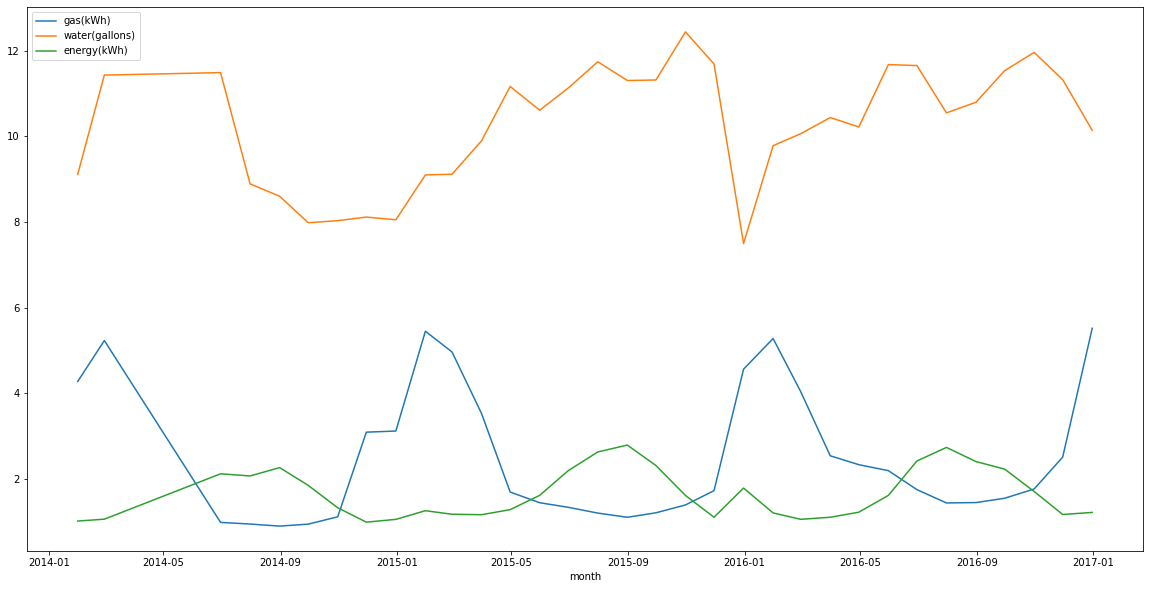

In [8]:
#Plot above calculated data
plt.figure(figsize=(20,10))
plt.plot(df2['datetime'],df2['gasuse_kwh'],label="gas(kWh)")
plt.plot(df2['datetime'],df2['wateruse'],label="water(gallons)")
plt.plot(df2['datetime'],df2['elecuse'],label="energy(kWh)")
#plt.xticks(np.arange(min(df['datetime']), max(df['datetime'])+1, 3))
plt.xlabel('month')
plt.legend()

plt.show()

